In [17]:
####Importação das bibliotecas
import pandas as pd
import pandas.io.sql as psql
import numpy as np
from matplotlib import pyplot as plt
import math
import psycopg2


usuario = 'postgres'
senha = 'qp34ja8u'
database = 'postgres'
host = 'localhost'

conn =  psycopg2.connect(host=host, database=database, user=usuario, password=senha)


In [18]:
#Strings de Consultas SQL
sql1 = 'select idh, count(id_viagem) as Turistas from viagem natural join  turista inner join pais on turista.cod_pais_origem = pais.cod_pais_origem where data_chegada > ' + "'" + '2015-01-01 00:00:00' + "'" + ' and data_chegada < ' + "'" + '2016-01-01 00:00:00' + "'" + ' group BY idh'
sql2 = 'select data_chegada, nome_estado, count(id_viagem) as turistas from viagem natural join estado_brasileiro where nome_estado in ' + '(' + "'" + 'São Paulo' + "'," + "'" 'Rio de Janeiro' + "'," + "'" + 'Bahia' + "'" + ')' + ' group by nome_estado, data_chegada'
sql3 = 'select continente_origem, data_chegada, count(id_viagem) as turistas from viagem natural join estado_brasileiro where continente_origem in (' + "'" + 'América do Sul' + "'," + "'" + 'Europa' + "'" + ') ' + 'and data_chegada > ' + "'" + '2014-12-01 00:00:00' + "'" + ' and data_chegada < ' + "'" + '2015-02-28 00:00:00' + "'" + ' group by data_chegada, continente_origem'
sql4 = 'select continente_origem, count(id_viagem) as turistas from viagem natural join estado_brasileiro where data_chegada > ' + "'" + '2013-01-01 00:00:00' + "'" + ' and data_chegada < ' + "'" + '2014-01-01 00:00:00' + "'" + ' group by continente_origem'
sql5 = 'select continente_origem, count(id_viagem) as turistas from viagem natural join estado_brasileiro where data_chegada > ' + "'" + '2014-01-01 00:00:00' + "'" + ' and data_chegada < ' + "'" + '2015-01-01 00:00:00' + "'" + ' group by continente_origem'
sql6 = 'select regiao, count(id_viagem) as turistas from viagem natural join estado_brasileiro where pais_origem = ' + "'" + 'Argentina' + "'" + ' group by regiao'


In [19]:
### Criação do daframe a partir das consultas SQL:
df1 = psql.read_sql(sql1, conn)
df2 = psql.read_sql(sql2, conn)
df3 = psql.read_sql(sql3, conn)
df4 = psql.read_sql(sql4, conn)
df5 = psql.read_sql(sql5, conn)
df6 = psql.read_sql(sql6, conn)


### Ajuste para criar colunas com nome dos estados para consulta sql2

df2 = df2.pivot(index = 'data_chegada', columns='nome_estado', values='turistas')
df2 = df2.fillna(0)

### Ajuste para criar colunas com nome dos continentes para consulta sql3
df3 = df3.pivot(index = 'data_chegada', columns='continente_origem', values='turistas')
df3 = df3.fillna(0)



Text(0, 0.5, 'Qtde. Turistas')

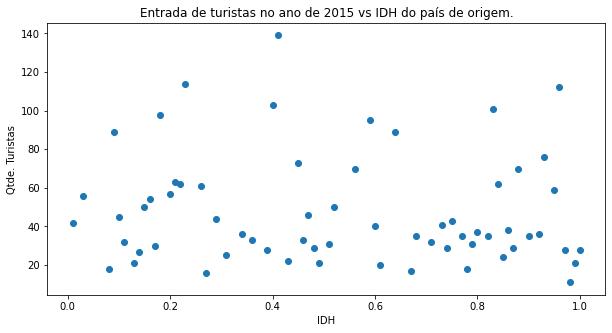

In [20]:

### Grafico 1 Scatter: Entrada de turistas no ano de 2015 vs IDH do país de origem.

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax1.scatter(df1['idh'], df1['turistas'])
ax1.set_title("Entrada de turistas no ano de 2015 vs IDH do país de origem.")
ax1.set_xlabel("IDH")
ax1.set_ylabel("Qtde. Turistas")

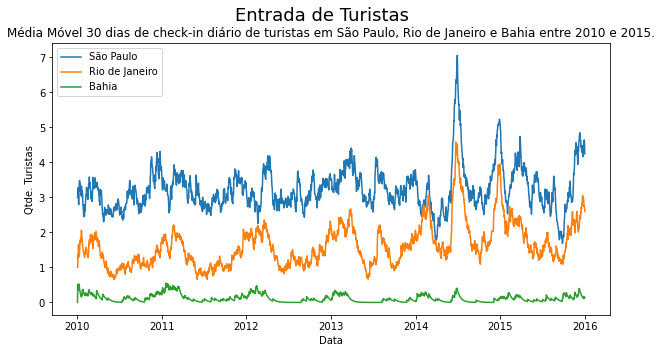

In [21]:
### Grafico 2 Linha: Entrada de turistas em São Paulo, Rio de Janeiro e Bahia

fig, ax2 = plt.subplots(1, 1, figsize=(10, 5))

df2['São Paulo'].ewm(span=30).mean().plot()
df2['Rio de Janeiro'].ewm(span=30).mean().plot()
df2['Bahia'].ewm(span=30).mean().plot()

ax2.legend(loc='upper left')
ax2.set_title("Média Móvel 30 dias de check-in diário de turistas em São Paulo, Rio de Janeiro e Bahia entre 2010 e 2015.")
ax2.set_xlabel("Data")
ax2.set_ylabel("Qtde. Turistas")
plt.suptitle('Entrada de Turistas', fontsize=18)
plt.show()

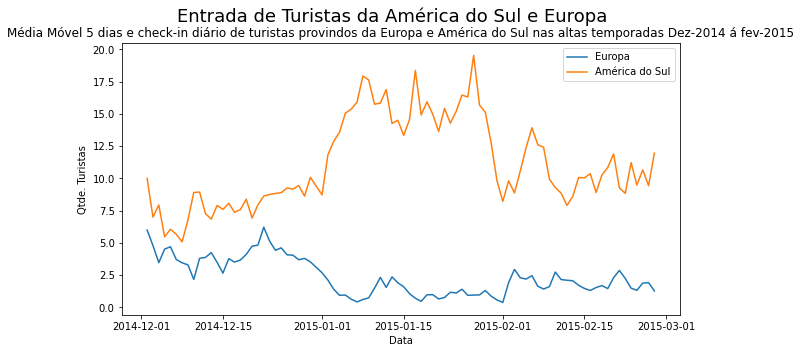

In [10]:
### Grafico 3 Linha: Entrada de turistas provindos da Europa e América do Sul nas altas temporadas

fig, ax3 = plt.subplots(1, 1, figsize=(10, 5))

df3['Europa'].ewm(span=5).mean().plot()
df3['América do Sul'].ewm(span=5).mean().plot()

ax3.legend(loc='upper right')
ax3.set_title("Média Móvel 5 dias e check-in diário de turistas provindos da Europa e América do Sul nas altas temporadas Dez-2014 á fev-2015")
ax3.set_xlabel("Data")
ax3.set_ylabel("Qtde. Turistas")
plt.suptitle('Entrada de Turistas da América do Sul e Europa', fontsize=18)
plt.show()

Text(0, 0.5, 'Qtde de Turistas')

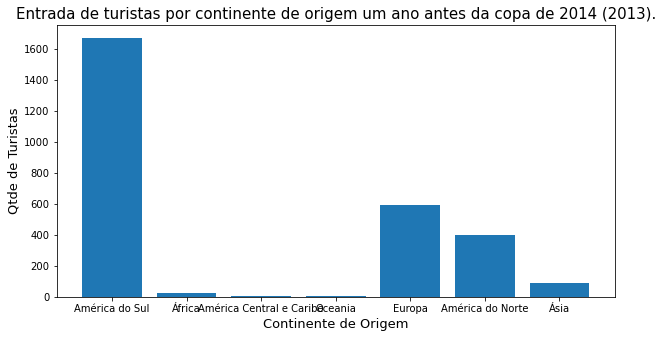

In [13]:
### Grafico 4 Barra: Entrada de turistas por continente de origem um ano antes da copa de 2014 (2013)

fig, ax4 = plt.subplots(1, 1, figsize=(10, 5))
ax4.bar(df4['continente_origem'], df4['turistas'])
ax4.set_title("Entrada de turistas por continente de origem um ano antes da copa de 2014 (2013).", fontsize = 15)
ax4.set_xlabel("Continente de Origem", fontsize = 13)
ax4.set_ylabel("Qtde de Turistas", fontsize = 13)


Text(0, 0.5, 'Qtde de Turistas')

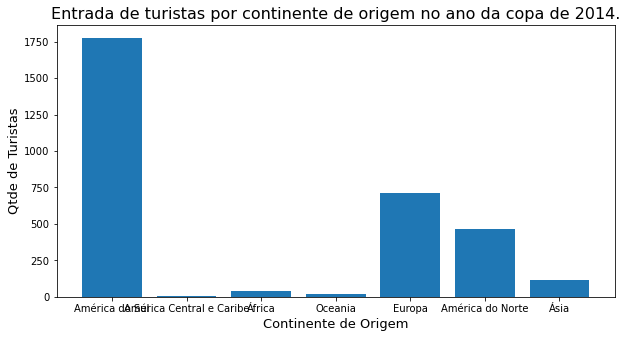

In [12]:
### Grafico 5 Barra: Entrada de turistas por continente de origem no ano da copa de 2014
fig, ax5 = plt.subplots(1, 1, figsize=(10, 5))
ax5.bar(df5['continente_origem'], df5['turistas'])
ax5.set_title("Entrada de turistas por continente de origem no ano da copa de 2014.", fontsize = 16)
ax5.set_xlabel("Continente de Origem", fontsize = 13)
ax5.set_ylabel("Qtde de Turistas", fontsize = 13)

Text(0, 0.5, 'Qtde de Turistas')

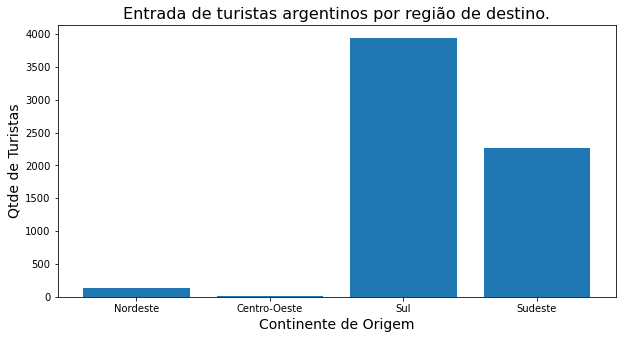

In [14]:
### Grafico 6 Barra: Entrada de turistas argentinos por região de destino
fig, ax6 = plt.subplots(1, 1, figsize=(10, 5))
ax6.bar(df6['regiao'], df6['turistas'])
ax6.set_title("Entrada de turistas argentinos por região de destino.", fontsize = 16)
ax6.set_xlabel("Continente de Origem", fontsize = 14)
ax6.set_ylabel("Qtde de Turistas", fontsize = 14)

In [15]:
print(sql1)
print()
print(sql2)
print()
print(sql3)
print()
print(sql4)
print()
print(sql5)
print()
print(sql6)

select idh, count(id_viagem) as Turistas from viagem natural join  turista inner join pais on turista.cod_pais_origem = pais.cod_pais_origem where data_chegada > '2015-01-01 00:00:00' and data_chegada < '2016-01-01 00:00:00' group BY idh

select data_chegada, nome_estado, count(id_viagem) as turistas from viagem natural join estado_brasileiro where nome_estado in ('São Paulo','Rio de Janeiro','Bahia') group by nome_estado, data_chegada

select continente_origem, data_chegada, count(id_viagem) as turistas from viagem natural join estado_brasileiro where continente_origem in ('América do Sul','Europa') and data_chegada > '2014-12-01 00:00:00' and data_chegada < '2015-02-28 00:00:00' group by data_chegada, continente_origem

select continente_origem, count(id_viagem) as turistas from viagem natural join estado_brasileiro where data_chegada > '2013-01-01 00:00:00' and data_chegada < '2014-01-01 00:00:00' group by continente_origem

select continente_origem, count(id_viagem) as turistas fro

In [16]:
df2.describe()

nome_estado,Bahia,Rio de Janeiro,São Paulo
count,2125.000000,2125.000000,2125.000000
mean,0.116706,1.640000,3.245647
std,0.353258,1.463556,1.956179
min,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000
50%,0.000000,1.000000,3.000000
75%,0.000000,2.000000,4.000000
max,3.000000,13.000000,13.000000
